In [1]:
import numpy as np

In [2]:
def find_max_abs(Z):
    ZZ = []
    for i in range(len(Z)):
        ZZ.append(abs(Z[i]))
    return max(ZZ)

#y = 1/(1+e^(kx+b))
def func(k, b, x):
    return 1/(1+np.exp(k*x+b))


In [73]:
def find_MSE(x, y):
    #начальный прогноз
    k1 = 0
    b1 = 0
    #y = 1/(1+e^(kx+b))

    #шаг 
    alpha = 0.01
    
    #погрешность
    e = 1e-2
 
    vect = np.array([k1, b1])
    
    def df_dk(x_i, vect):
        #print('df_dk=', x_i*np.exp(vect[0]*x_i+vect[1])*(-func(vect[0], vect[1], x_i)**2))
        return x_i*np.exp(vect[0]*x_i+vect[1])*(-func(vect[0], vect[1], x_i)**2)
    def df_db(x_i, vect):
        #print('df_db=', np.exp(vect[0]*x_i+vect[1])*(-func(vect[0], vect[1], x_i)**2))
        return np.exp(vect[0]*x_i+vect[1])*(-func(vect[0], vect[1], x_i)**2)
    def dMSE_df(x_i, y_i, vect):
        #print('dMSE=', func(vect[0], vect[1], x_i)-y_i)
        return 2*(func(vect[0], vect[1], x_i)-y_i)
    
    #vect = np.array([k1, b1])
    j = 0
    while (1):
        grad_sigma = np.array([0.0,0.0])
        for i in range(len(x)):
            #f = func(vect[0], vect[1], x[i])
            a = dMSE_df(x[i], y[i], vect)
            grad_k = a * df_dk(x[i], vect)
            grad_b = a * df_db(x[i], vect)
            grad_sigma += np.array([grad_k, grad_b])/len(x)
        vect = vect - 1*alpha*grad_sigma
        j+=1
        if (j % 10000 == 0):
            print('vect=', vect, 'grad=', grad_sigma)
        if(np.linalg.norm(grad_sigma) < e):
            break
    return vect[0], vect[1], alpha, e

In [74]:
def find_log_loss(x, y):

    #начальный прогноз
    k1 = 0
    b1 = 0
    #y = 1/(1+e^(kx+b))
    
    #шаг выбирается,чтобы метод сходился
    alpha = 0.01
    #погрешность
    e = 1e-3
 
    vect = np.array([k1, b1])
    
    def df_dk(x_i, vect):
        return x_i*np.exp(vect[0]*x_i+vect[1])*(-func(vect[0], vect[1], x_i)**2)
    def df_db(x_i, vect):
        return np.exp(vect[0]*x_i+vect[1])*(-func(vect[0], vect[1], x_i)**2)
    def dlog_los(f, y_i):
        return (y_i - f)/(f*(1-f))
    
    j = 0
    while (1):
        grad_sigma = np.array([0.0,0.0])
        for i in range(len(x)):
            f = func(vect[0], vect[1], x[i])
            a = (y[i] - f)
            grad_k = a * x[i]
            grad_b = a 
            grad_sigma += np.array([grad_k, grad_b])/len(x)
        vect = vect - 1*alpha*grad_sigma
        j+=1
        if (j % 10000 == 0):
            print('vect=', vect, 'grad=', grad_sigma)
        if(np.linalg.norm(grad_sigma) < e):
            break
    return vect[0], vect[1], alpha, e

In [132]:
import matplotlib.pyplot as plt
def plot(f, X, Y, title):
    data = f(X, Y)
    k = data[0]
    b = data[1]
    alpha = data[2]
    e = data[3]
    func_x = np.arange(min(X), max(X), (max(X)-min(X))/100)
    func_y = func(k, b, func_x)
    plt.scatter(X, Y, c='red')
    plt.plot(func_x,func_y,c='blue',label=r'$y = \frac{1}{1+e^{%(k).2fx+%(b).2f}}, \alpha=%(a)3f, \epsilon=%(e).3f $'  %{'k':k, 'b':b, 'a':alpha, 'e':e})
    plt.title(title)
    plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
    plt.grid()
    plt.show()

vect= [-0.05796575  1.66673025] grad= [ 0.00019984 -0.01032663]


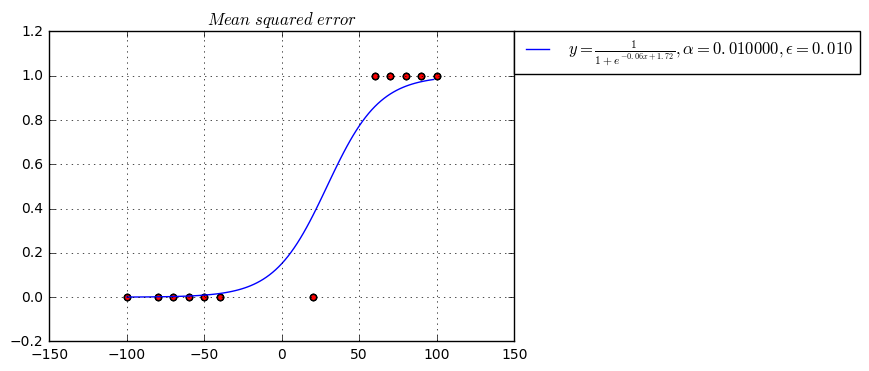

vect= [-0.09877169  2.98369327] grad= [ 0.00033176 -0.01571164]
vect= [-0.12471846  4.16570622] grad= [ 0.00020561 -0.00908532]
vect= [-0.14204011  4.920478  ] grad= [ 0.00014708 -0.00633025]
vect= [-0.15495723  5.47235266] grad= [ 0.000114   -0.00483775]
vect= [-0.16523181  5.90635983] grad= [  9.29046270e-05  -3.90745756e-03]
vect= [-0.17375247  6.26359235] grad= [  7.83279361e-05  -3.27404937e-03]
vect= [-0.18102674  6.56694274] grad= [  6.76725686e-05  -2.81576910e-03]
vect= [-0.18737079  6.83043679] grad= [  5.95523456e-05  -2.46917584e-03]
vect= [-0.19299451  7.06327594] grad= [  5.31628778e-05  -2.19806110e-03]
vect= [-0.19804422  7.27181634] grad= [  4.80063139e-05  -1.98029082e-03]
vect= [-0.2026259  7.4606294] grad= [  4.37584380e-05  -1.80158911e-03]
vect= [-0.20681875  7.63311124] grad= [  4.01992337e-05  -1.65234300e-03]
vect= [-0.21068347  7.79185289] grad= [  3.71742322e-05  -1.52584633e-03]
vect= [-0.21426762  7.93887564] grad= [  3.45718437e-05  -1.41728038e-03]
vect= 

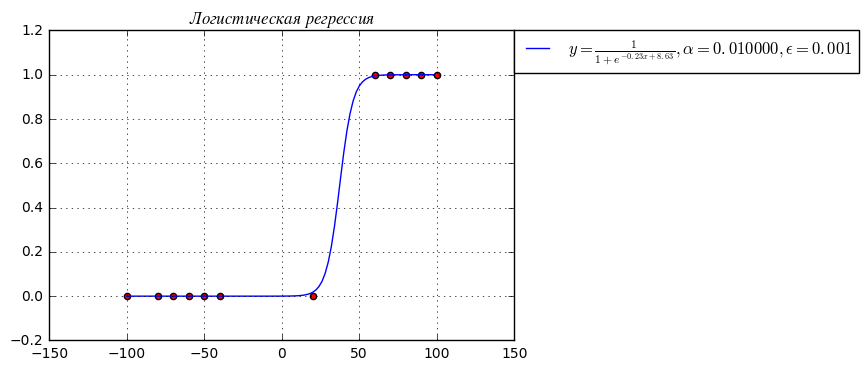

In [133]:
X = np.array([-100,-80,-50,-60,-40,20,60,90,70,80, -70,100])/1
Y = [0,0,0,0, 0,0,1,1,1,1,0,1]
plot(find_MSE, X, Y, '$Mean \ squared \ error$')
plot(find_log_loss, X, Y, '$Логистическая \ регрессия$')